# Assignment 2

## Kaggle Competition
## Santander Customer Transaction Prediction
At Santander our mission is to help people and businesses prosper. We are always looking for ways to help our customers understand their financial health and identify which products and services might help them achieve their monetary goals.
Our data science team is continually challenging our machine learning algorithms, working with the global data science community to make sure we can more accurately identify new ways to solve our most common challenge, binary classification problems such as: is a customer satisfied? Will a customer buy this product? Can a customer pay this loan?
In this challenge, we invite Kagglers to help us identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted. The data provided for this competition has the same structure as the real data we have available to solve this problem.


## Dataset
Tha dataset is taken from https://www.kaggle.com/c/santander-customer-transaction-prediction/data
File descriptions
train.csv - the training set.
test.csv - the test set.
The test set contains some rows which are not included in scoring. sample_submission.csv - a sample submission file in the correct format.

## Abstract
At Santander our mission is to help people and help businesses prosper. We are always looking for ways to help our customers understand their financial health and identify which products and services might help them achieve their monetary goals.
Our method is firstly to analyze the distribution of the dataset, the condition of balance in the dataset, average number and standard deviation of both rows and columns.
Then we use the H2O AUTOML platform to generate the best models, and use the best model to predict the value in the test datset, and the rank is 1948 out of 3000 which was not a good score and then we started to train the model using LightGBM and predicted the target. The final step is tunning the hyperparameters of the model by adding more number of leaves, maxbin,reducing the learning rate and adding more parameters. We got even better outcome of 589 out of 3000 after tunning the hyperparameters and training the best model to predict the results.

In [1]:
import h2o
from h2o.automl import H2OAutoML

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_151"; Java(TM) SE Runtime Environment (build 1.8.0_151-b12); Java HotSpot(TM) 64-Bit Server VM (build 25.151-b12, mixed mode)
  Starting server from /anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/tk/pytwxv0d0lj15jmrx9f4jwl80000gn/T/tmpg2wakfx7
  JVM stdout: /var/folders/tk/pytwxv0d0lj15jmrx9f4jwl80000gn/T/tmpg2wakfx7/h2o_haozhou_started_from_python.out
  JVM stderr: /var/folders/tk/pytwxv0d0lj15jmrx9f4jwl80000gn/T/tmpg2wakfx7/h2o_haozhou_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.1
H2O cluster version age:,3 months and 29 days !!!
H2O cluster name:,H2O_from_python_haozhou_xem0o7
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


## Readin Train data

In [3]:
#import the dataset
df_train = h2o.import_file(path = 'train.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


Lets have a look at the dataset

In [4]:
df_train.head()

ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197
train_0,0,8.9255,-6.7863,11.9081,5.093,11.4607,-9.2834,5.1187,18.6266,-4.92,5.747,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.284,30.7133,10.535,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.192,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.017,5.9226,-14.2136,16.0283,5.3253,12.9194,29.046,-0.694,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.959,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.701,21.6374,0.5663,5.1999,8.86,43.1127,18.3816,-2.344,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.71,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.524,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.78,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.676,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.691,18.5227,-2.3978,7.8784,8.5635
train_1,0,11.5006,-4.1473,13.8588,5.389,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.891,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.371,11.3702,0.7399,2.7995,5.8434,10.816,3.6783,-11.1147,1.873,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.921,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.022,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.821,-5.485,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.695,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.955,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.51,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697,2.4354,0.8194,16.5346,12.4205,-0.178,5.7582,7.0513,1.9568,-8.9921,9.7797,1

In [5]:
df_train.describe()

Rows:200000
Cols:202




,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
type,string,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real
mins,NaN,0.0,0.4084,-15.0434,2.1171,-0.0402,5.0748,-32.5626,2.3473,5.3497,-10.5055,3.9705,-20.7313,-26.095,13.4346,-6.0111,1.0133,13.0769,0.6351,-33.3802,-10.6642,-12.4025,-5.4322,-10.089,-5.3225,1.2098,-0.6784,12.72,-24.2431,-6.1668,2.0896,-4.7872,-34.7984,2.1406,-8.9861,1.5085,9.8169,-16.5136,-8.0951,-1.1834,-6.3371,-14.5457,-35.2117,-8.5359,8.859,10.6528,-9.9396,-90.2525,1.2062,-47.6862,-23.9022,-8.0707,10.3855,-15.0462,-24.7214,3.3449,-26.7786,-3.7826,2.7618,3.4423,-12.6009,6.184,-2.1006,-48.8027,-6.3289,-10.5544,1.6117,-14.0888,1.3368,-19.5443,4.9938,-16.3094,-17.0275,-0.224,-12.3834,-1.6658,-34.1015,-1.2936,-21.6333,7.4257,-1.8183,10.4454,-18.0422,7.5865,-30.0266,-24.2201,-24.4398,7.023,-19.2722,-8.4816,1.3502,-9.6014,-61.718,6.5218,-1.0185,8.4916,2.819,-2.4324,-12.1584,-21.74,-0.6035,-7.2806,-39.1791,0.0757,-7.3829,0.9793,4.0846,0.7153,0.9424,-5.898,13.729,5.7697,-9.2398,2.1942,-2.0302,-5.5139,-0.0505,-6.8586,-3.163,-31.8369,-37.5277,-9.7742,-18.6962,6.3052,-15.194,-12.4059,-7.0538,11.4861,11.2654,-8.8769,-11.7559,2.1863,9.5283,-0.9548,2.89,5.3593,-24.2546,-31.3808,-9.9493,-9.851,-16.4684,-21.2743,-15.4595,-16.6937,-7.108,2.8068,5.4443,-8.2734,0.4274,-29.984,3.3205,-41.1683,9.242,-2.1915,-2.88,11.0308,-8.1966,-21.8409,9.9965,-22.9904,-4.5544,-4.6416,-7.4522,4.8526,0.6231,-6.5317,-19.9977,3.8167,1.8512,-35.9695,-5.2502,4.2588,-14.506,-22.4793,-11.4533,-22.7487,-2.9953,3.2415,-29.1165,4.9521,-29.2734,-7.8561,-22.0374,5.4165,-26.0011,-4.8082,-18.4897

It seems that there's no missing value in the dataset.

In [6]:
y = 'target'
X = [name for name in df_train.columns if name != y]
print(X)

['ID_code', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8', 'var_9', 'var_10', 'var_11', 'var_12', 'var_13', 'var_14', 'var_15', 'var_16', 'var_17', 'var_18', 'var_19', 'var_20', 'var_21', 'var_22', 'var_23', 'var_24', 'var_25', 'var_26', 'var_27', 'var_28', 'var_29', 'var_30', 'var_31', 'var_32', 'var_33', 'var_34', 'var_35', 'var_36', 'var_37', 'var_38', 'var_39', 'var_40', 'var_41', 'var_42', 'var_43', 'var_44', 'var_45', 'var_46', 'var_47', 'var_48', 'var_49', 'var_50', 'var_51', 'var_52', 'var_53', 'var_54', 'var_55', 'var_56', 'var_57', 'var_58', 'var_59', 'var_60', 'var_61', 'var_62', 'var_63', 'var_64', 'var_65', 'var_66', 'var_67', 'var_68', 'var_69', 'var_70', 'var_71', 'var_72', 'var_73', 'var_74', 'var_75', 'var_76', 'var_77', 'var_78', 'var_79', 'var_80', 'var_81', 'var_82', 'var_83', 'var_84', 'var_85', 'var_86', 'var_87', 'var_88', 'var_89', 'var_90', 'var_91', 'var_92', 'var_93', 'var_94', 'var_95', 'var_96', 'var_97', 'var_98', 'var_99'

Total columns:

In [7]:
print(len(X))

201


Column types:

In [8]:
df_train.types

{'ID_code': 'string',
 'target': 'int',
 'var_0': 'real',
 'var_1': 'real',
 'var_2': 'real',
 'var_3': 'real',
 'var_4': 'real',
 'var_5': 'real',
 'var_6': 'real',
 'var_7': 'real',
 'var_8': 'real',
 'var_9': 'real',
 'var_10': 'real',
 'var_11': 'real',
 'var_12': 'real',
 'var_13': 'real',
 'var_14': 'real',
 'var_15': 'real',
 'var_16': 'real',
 'var_17': 'real',
 'var_18': 'real',
 'var_19': 'real',
 'var_20': 'real',
 'var_21': 'real',
 'var_22': 'real',
 'var_23': 'real',
 'var_24': 'real',
 'var_25': 'real',
 'var_26': 'real',
 'var_27': 'real',
 'var_28': 'real',
 'var_29': 'real',
 'var_30': 'real',
 'var_31': 'real',
 'var_32': 'real',
 'var_33': 'real',
 'var_34': 'real',
 'var_35': 'real',
 'var_36': 'real',
 'var_37': 'real',
 'var_38': 'real',
 'var_39': 'real',
 'var_40': 'real',
 'var_41': 'real',
 'var_42': 'real',
 'var_43': 'real',
 'var_44': 'real',
 'var_45': 'real',
 'var_46': 'real',
 'var_47': 'real',
 'var_48': 'real',
 'var_49': 'real',
 'var_50': 'real',
 

Define the runtime and the name of project

In [9]:
run_time=60 * 20
project ="automl_test"  # project_name = project
df_train[y] = df_train[y].asfactor()

## Use H2O AUTOML to generate models 

Initialize the model and train

In [10]:
# automl
# runs for run_time seconds then builds a stacked ensemble
aml = H2OAutoML(max_runtime_secs=run_time,project_name = project) # init automl, run for 300 seconds
aml.train(x=X,  
           y=y,
           training_frame=df_train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


### Leaderboard

In [11]:
# view leaderboard
print(aml.leaderboard)


model_id,auc,logloss,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20190224_212548,0.872329,0.224509,0.256929,0.252008,0.063508
StackedEnsemble_AllModels_AutoML_20190224_212548,0.872329,0.224509,0.256929,0.252008,0.063508
GLM_grid_1_AutoML_20190224_212548_model_1,0.859378,0.232107,0.270732,0.258029,0.0665789
XRT_1_AutoML_20190224_212548,0.805302,0.279015,0.31685,0.282503,0.0798079
DRF_1_AutoML_20190224_212548,0.802965,0.278544,0.314142,0.282269,0.0796759


#### According to the leaderboard, we can check that the StackedEnsemble is the best one

In [12]:
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_AutoML_20190224_212548
No model summary for this model


ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.020346872760132827
RMSE: 0.14264246478567602
LogLoss: 0.0880384297076224
Null degrees of freedom: 180110
Residual degrees of freedom: 180107
Null deviance: 117422.0667289237
Residual deviance: 31713.379226139157
AIC: 31721.379226139157
AUC: 0.9881178601944829
pr_auc: 0.8810627310623096
Gini: 0.9762357203889658
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3265819433271529: 


,0,1,Error,Rate
0,160195.0,1832.0,0.0113,(1832.0/162027.0)
1,2618.0,15466.0,0.1448,(2618.0/18084.0)
Total,162813.0,17298.0,0.0247,(4450.0/180111.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3265819,0.8742298,197.0
max f2,0.1685283,0.8861337,255.0
max f0point5,0.5556391,0.9122073,136.0
max accuracy,0.3715834,0.9755429,184.0
max precision,0.9995940,1.0,0.0
max recall,0.0149758,1.0,398.0
max specificity,0.9995940,1.0,0.0
max absolute_mcc,0.3296556,0.8608544,196.0
max min_per_class_accuracy,0.1182071,0.9488233,280.0
max mean_per_class_accuracy,0.1205802,0.9490419,279.0


Gains/Lift Table: Avg response rate: 10.04 %, avg score: 11.41 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100049,0.9983617,9.9596881,9.9596881,1.0,0.9993357,1.0,0.9993357,0.0996461,0.0996461,895.9688122,895.9688122
,2,0.0200043,0.9936060,9.9596881,9.9596881,1.0,0.9963321,1.0,0.9978343,0.0995908,0.1992369,895.9688122,895.9688122
,3,0.0300037,0.9818653,9.9596881,9.9596881,1.0,0.9883981,1.0,0.9946895,0.0995908,0.2988277,895.9688122,895.9688122
,4,0.0400031,0.9567161,9.9596881,9.9596881,1.0,0.9708442,1.0,0.9887290,0.0995908,0.3984185,895.9688122,895.9688122
,5,0.0500025,0.9091438,9.9541580,9.9585822,0.9994448,0.9351260,0.9998890,0.9780096,0.0995355,0.4979540,895.4158034,895.8582227
,6,0.1000050,0.2891143,7.4404599,8.6995211,0.7470575,0.6089134,0.8734732,0.7934615,0.3720416,0.8699956,644.0459881,769.9521054
,7,0.1500019,0.1037802,1.7099031,6.3698209,0.1716824,0.1695650,0.6395603,0.5855114,0.0854899,0.9554855,70.9903147,536.9820893
,8,0.2000044,0.0650662,0.4191341,4.8821079,0.0420831,0.0809988,0.4901868,0.4593797,0.0209578,0.9764433,-58.0865890,388.2107899
,9,0.3000039,0.0416864,0.1238671,3.2960570,0.0124368,0.0509961,0.3309398,0.3232544,0.0123866,0.9888299,-87.6132911,229.6056983
,10,0.4000033,0.0328184,0.0547448,2.4857402,0.0054966,0.0367416,0.2495801,0.2516272,0.0054745,0.9943044,-94.5255171,148.5740192




ModelMetricsBinomialGLM: stackedensemble
** Reported on validation data. **

MSE: 0.0637183863444334
RMSE: 0.2524250113289755
LogLoss: 0.22465909881392346
Null degrees of freedom: 19888
Residual degrees of freedom: 19885
Null deviance: 13041.261950048633
Residual deviance: 8936.489632620247
AIC: 8944.489632620247
AUC: 0.8772068388413969
pr_auc: 0.551010359218546
Gini: 0.7544136776827939
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2444949859073843: 


,0,1,Error,Rate
0,16959.0,916.0,0.0512,(916.0/17875.0)
1,938.0,1076.0,0.4657,(938.0/2014.0)
Total,17897.0,1992.0,0.0932,(1854.0/19889.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2444950,0.5371942,213.0
max f2,0.0979569,0.6105450,294.0
max f0point5,0.4656619,0.5883247,139.0
max accuracy,0.4656619,0.9192016,139.0
max precision,0.9945503,1.0,0.0
max recall,0.0145021,1.0,399.0
max specificity,0.9945503,1.0,0.0
max absolute_mcc,0.3033775,0.4875306,189.0
max min_per_class_accuracy,0.0779030,0.7943497,312.0
max mean_per_class_accuracy,0.0979569,0.7965542,294.0


Gains/Lift Table: Avg response rate: 10.13 %, avg score: 10.31 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100055,0.9248702,8.4858728,8.4858728,0.8592965,0.9619368,0.8592965,0.9619368,0.0849057,0.0849057,748.5872760,748.5872760
,2,0.0200111,0.8410734,7.8407479,8.1633103,0.7939698,0.8829109,0.8266332,0.9224239,0.0784508,0.1633565,684.0747930,716.3310345
,3,0.0300166,0.7322607,6.4016233,7.5760813,0.6482412,0.7865998,0.7671692,0.8771492,0.0640516,0.2274081,540.1623310,657.6081334
,4,0.0400221,0.6249395,6.1038734,7.2080293,0.6180905,0.6747834,0.7298995,0.8265577,0.0610725,0.2884806,510.3873389,620.8029347
,5,0.0500277,0.5308463,5.8061235,6.9276482,0.5879397,0.5764514,0.7015075,0.7765365,0.0580933,0.3465740,480.6123467,592.7648171
,6,0.1000050,0.2434015,3.7454883,5.3373682,0.3792757,0.3557870,0.5404726,0.5662675,0.1871897,0.5337637,274.5488322,433.7368186
,7,0.1500327,0.1492519,2.0643995,4.2460130,0.2090452,0.1876920,0.4299598,0.4400334,0.1032771,0.6370407,106.4399455,324.6012996
,8,0.2000101,0.1065702,1.7584919,3.6244454,0.1780684,0.1255571,0.3670186,0.3614538,0.0878848,0.7249255,75.8491865,262.4445373
,9,0.3000151,0.0673408,1.0376837,2.7621915,0.1050779,0.0840871,0.2797050,0.2689982,0.1037736,0.8286991,3.7683675,176.2191474
,10,0.4000201,0.0487524,0.6106942,2.2243172,0.0618401,0.0570738,0.2252388,0.2160171,0.0610725,0.8897716,-38.9305780,122.4317160




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.06350803432099066
RMSE: 0.25200800447801386
LogLoss: 0.2245088626428313
Null degrees of freedom: 180110
Residual degrees of freedom: 180107
Null deviance: 117423.64977974322
Residual deviance: 80873.03151892599
AIC: 80881.03151892599
AUC: 0.8723294527604921
pr_auc: 0.5476107718159219
Gini: 0.7446589055209842
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.22038810471147566: 


,0,1,Error,Rate
0,152605.0,9422.0,0.0582,(9422.0/162027.0)
1,8241.0,9843.0,0.4557,(8241.0/18084.0)
Total,160846.0,19265.0,0.0981,(17663.0/180111.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2203881,0.5270824,226.0
max f2,0.0962150,0.5979859,298.0
max f0point5,0.4446695,0.5760870,145.0
max accuracy,0.5353672,0.9190610,119.0
max precision,0.9901016,0.9792746,2.0
max recall,0.0145947,1.0,399.0
max specificity,0.9963294,0.9999877,0.0
max absolute_mcc,0.2500680,0.4751555,213.0
max min_per_class_accuracy,0.0759774,0.7885106,316.0
max mean_per_class_accuracy,0.0866072,0.7900511,306.0


Gains/Lift Table: Avg response rate: 10.04 %, avg score: 10.04 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100049,0.9149645,8.9371896,8.9371896,0.8973363,0.9585584,0.8973363,0.9585584,0.0894161,0.0894161,793.7189619,793.7189619
,2,0.0200043,0.8076891,7.9577963,8.4476289,0.7990006,0.8629991,0.8481821,0.9107920,0.0795731,0.1689892,695.7796340,744.7628893
,3,0.0300037,0.6870517,6.6858761,7.8604866,0.6712937,0.7478432,0.7892302,0.8564858,0.0668547,0.2358438,568.5876146,686.0486647
,4,0.0400031,0.5746624,5.8397727,7.3553783,0.5863409,0.6293275,0.7385149,0.7997041,0.0583942,0.2942380,483.9772713,635.5378279
,5,0.0500025,0.4853169,4.9936693,6.8830889,0.5013881,0.5278797,0.6910948,0.7453452,0.0499336,0.3441716,399.3669281,588.3088926
,6,0.1000050,0.2373644,3.6350760,5.2590825,0.3649789,0.3379487,0.5280369,0.5416470,0.1817629,0.5259345,263.5076045,425.9082486
,7,0.1500019,0.1476048,2.2684420,4.2622761,0.2277624,0.1858279,0.4279528,0.4230494,0.1134152,0.6393497,126.8442014,326.2276125
,8,0.2000044,0.1050999,1.5051228,3.5729686,0.1511215,0.1239491,0.3587430,0.3482722,0.0752599,0.7146096,50.5122755,257.2968648
,9,0.3000039,0.0669897,1.0019963,2.7159937,0.1006052,0.0832503,0.2726987,0.2599332,0.1001991,0.8148087,0.1996273,171.5993717
,10,0.4000033,0.0489939,0.6585969,2.2016516,0.0661263,0.0570794,0.2210563,0.2092205,0.0658593,0.8806680,-34.1403112,120.1651649


In [13]:
aml.leader.algo

'stackedensemble'

#### Transfer the leaderboader to a dataframe

In [14]:
aml_leaderboard_df = aml.leaderboard.as_data_frame()

In [15]:
aml_leaderboard_df.head()

,model_id,auc,logloss,mean_per_class_error,rmse,mse
0,StackedEnsemble_BestOfFamily_AutoML_20190224_2...,0.872329,0.224509,0.256929,0.252008,0.063508
1,StackedEnsemble_AllModels_AutoML_20190224_212548,0.872329,0.224509,0.256929,0.252008,0.063508
2,GLM_grid_1_AutoML_20190224_212548_model_1,0.859378,0.232107,0.270732,0.258029,0.066579
3,XRT_1_AutoML_20190224_212548,0.805302,0.279015,0.316850,0.282503,0.079808
4,DRF_1_AutoML_20190224_212548,0.802965,0.278544,0.314142,0.282269,0.079676


Since the StackedEnsemble is not a single model.
Its the combination of different algorithm.
So just choose the algorithms other than the stacked ensemble

In [16]:
m_id=''
for model in aml_leaderboard_df['model_id']:
    if 'StackedEnsemble' not in model:
      print (model)
      if m_id=='':
            m_id=model
print ("model_id ", m_id)

GLM_grid_1_AutoML_20190224_212548_model_1
XRT_1_AutoML_20190224_212548
DRF_1_AutoML_20190224_212548
model_id  GLM_grid_1_AutoML_20190224_212548_model_1


In [31]:
best_model= h2o.get_model(m_id)
best_model.algo

'glm'

The GLM doesn't have the variable importance, so we choose 

In [32]:
print(best_model.varimp())

None


## Import the test data

In [19]:
df_test = h2o.import_file(path = 'test.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [20]:
df_test.head

ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.81,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.061,3.5331,9.7804,8.7625,-15.6305,18.8766,11.2864,11.8362,13.368,-31.9891,12.1776,8.7714,17.2011,16.8508,13.0534,14.4069,-4.8525,7.3213,-0.5259,16.6365,19.3036,6.4129,-5.3948,9.3269,11.9314,-3.575,-0.7706,0.8705,6.9282,2.8914,5.9744,17.4851,5.0125,-1.423,33.3401,0.8018,-4.7906,30.2708,26.8339,21.7205,7.3075,14.081,3.1192,17.4265,9.4883,16.906,14.5117,10.0276,-0.9706,20.4588,4.7945,20.416,13.1633,7.9307,-7.6509,7.0834,15.2324,10.1416,5.9156,-0.5775,5.76,30.3238,2.1251,1.8585,-9.2198,17.3089,30.9548,1.4918,12.8721,3.4902,8.2856,11.9794,14.0176,15.0763,3.7662,6.0426,4.4243,14.1799,2.0921,1.5493,3.2206,0.0172,-6.6602,8.4785,42.0248,11.4164,0.4564,9.4006,0.9685,12.4929,14.124,4.0388,-4.4442,16.6684,12.538,0.9205,10.5998,7.5147,-4.1748,-0.4824,10.5267,17.7547,-6.5226,-2.5502,-5.1547,-2.1246,19.8319,13.0752,9.2275,3.0213,11.6793,-11.6827,4.1017,5.2954,18.7741,9.8892,7.5219,14.9745,18.988,1.0842,11.9125,-4.5103,16.1361,11.0067,5.9232,5.4113,3.8302,5.738,-8.6105,22.953,2.5531,-0.2836,4.3416,5.1855,4.2603,1.6779,29.0849,8.4685,18.1317,12.2818,-0.6912,10.2226,-5.5579,2.2926,-4.5358,10.3903,-15.4937,3.9697,31.3521,-1.1651,9.2874,-23.5705,13.2643,1.6591,-2.1556,11.8495,-1.43,2.4508,13.7112,2.4669,4.3654,10.72,15.4722,-8.7197
test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.331,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.091,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.708,2.9965,-10.472,11.4938,-0.966,15.3445,10.6361,0.8966,6.7428,2.3421,12.8678,-1.5536,10.0309,3.1337,10.5742,11.7664,2.1782,-41.1924,13.5322,-17.3834,6.3806,12.5589,11.6887,25.393,1.5776,6.8481,8.7348,16.4239,21.7056,6.9345,1.6678,9.5249,5.3383,-18.7083,1.3382,-1.7401,5.8398,3.1051,4.4307,16.0005,5.0306,-7.3365,12.2806,0.6992,-0.7772,21.5123,6.7803,18.1896,6.9388,22.1336,6.3755,13.1525,1.9772,14.0406,6.6904,9.9732,-11.5679,20.4525,9.4951,9.6343,8.1252,2.6059,-17.4201,7.1848,15.3484,10.6522,5.9897,0.3392,10.3516,29.8204,1.9998,-1.4166,-1.7257,15.4712,35.602,1.657,13.0783,2.7752,6.4986,4.6835,13.7963,17.7261,1.7375,5.5689,3.6609,8.9725,4.1159,1.0693,2.0234,8.276,-6.861,0.278,17.0488,11.6704,3.1215,8.5093,5.6367,12.0099,14.2372,-6.16,-5.669,8.9094,11.0605,0.4583,9.

<bound method H2OFrame.head of >

## Predict the value according to the h2o object(using the best model automatically)

In [21]:
pred = aml.predict(df_test)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [22]:
len(pred)

200000

The outcome shows me the probability of 0 or 1 respectively.

In [23]:
pred

predict,p0,p1
0,0.831706,0.168294
0,0.904945,0.0950547
0,0.918555,0.0814445
0,0.912868,0.0871319
0,0.927999,0.0720009
0,0.980811,0.0191889
0,0.977354,0.0226464
0,0.884707,0.115293
0,0.983459,0.0165414
0,0.983355,0.0166448


Then I choose the first column of the prediction table as the outcome of prediction

In [24]:
df_test['targ'] = pred[0]

check the size, same as the training rows.

In [25]:
len(df_test)

200000

In [26]:
df_test.head

ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,targ
test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.81,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.061,3.5331,9.7804,8.7625,-15.6305,18.8766,11.2864,11.8362,13.368,-31.9891,12.1776,8.7714,17.2011,16.8508,13.0534,14.4069,-4.8525,7.3213,-0.5259,16.6365,19.3036,6.4129,-5.3948,9.3269,11.9314,-3.575,-0.7706,0.8705,6.9282,2.8914,5.9744,17.4851,5.0125,-1.423,33.3401,0.8018,-4.7906,30.2708,26.8339,21.7205,7.3075,14.081,3.1192,17.4265,9.4883,16.906,14.5117,10.0276,-0.9706,20.4588,4.7945,20.416,13.1633,7.9307,-7.6509,7.0834,15.2324,10.1416,5.9156,-0.5775,5.76,30.3238,2.1251,1.8585,-9.2198,17.3089,30.9548,1.4918,12.8721,3.4902,8.2856,11.9794,14.0176,15.0763,3.7662,6.0426,4.4243,14.1799,2.0921,1.5493,3.2206,0.0172,-6.6602,8.4785,42.0248,11.4164,0.4564,9.4006,0.9685,12.4929,14.124,4.0388,-4.4442,16.6684,12.538,0.9205,10.5998,7.5147,-4.1748,-0.4824,10.5267,17.7547,-6.5226,-2.5502,-5.1547,-2.1246,19.8319,13.0752,9.2275,3.0213,11.6793,-11.6827,4.1017,5.2954,18.7741,9.8892,7.5219,14.9745,18.988,1.0842,11.9125,-4.5103,16.1361,11.0067,5.9232,5.4113,3.8302,5.738,-8.6105,22.953,2.5531,-0.2836,4.3416,5.1855,4.2603,1.6779,29.0849,8.4685,18.1317,12.2818,-0.6912,10.2226,-5.5579,2.2926,-4.5358,10.3903,-15.4937,3.9697,31.3521,-1.1651,9.2874,-23.5705,13.2643,1.6591,-2.1556,11.8495,-1.43,2.4508,13.7112,2.4669,4.3654,10.72,15.4722,-8.7197,0
test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.331,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.091,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.708,2.9965,-10.472,11.4938,-0.966,15.3445,10.6361,0.8966,6.7428,2.3421,12.8678,-1.5536,10.0309,3.1337,10.5742,11.7664,2.1782,-41.1924,13.5322,-17.3834,6.3806,12.5589,11.6887,25.393,1.5776,6.8481,8.7348,16.4239,21.7056,6.9345,1.6678,9.5249,5.3383,-18.7083,1.3382,-1.7401,5.8398,3.1051,4.4307,16.0005,5.0306,-7.3365,12.2806,0.6992,-0.7772,21.5123,6.7803,18.1896,6.9388,22.1336,6.3755,13.1525,1.9772,14.0406,6.6904,9.9732,-11.5679,20.4525,9.4951,9.6343,8.1252,2.6059,-17.4201,7.1848,15.3484,10.6522,5.9897,0.3392,10.3516,29.8204,1.9998,-1.4166,-1.7257,15.4712,35.602,1.657,13.0783,2.7752,6.4986,4.6835,13.7963,17.7261,1.7375,5.5689,3.6609,8.9725,4.1159,1.0693,2.0234,8.276,-6.861,0.278,17.0488,11.6704,3.1215,8.5093,5.6367,12.0099,14.2372,-6.16,-5.669,8.9094,11.0605,0.

<bound method H2OFrame.head of >

### Create the submission table with two columns(ID_code, targ)

In [27]:
submission = df_test[['ID_code', 'targ']]

In [28]:
submission.head

ID_code,targ
test_0,0
test_1,0
test_2,0
test_3,0
test_4,0
test_5,0
test_6,0
test_7,0
test_8,0
test_9,0


<bound method H2OFrame.head of >

## Choose some most important features.

In [35]:
models_dict={}
for m in aml_leaderboard_df['model_id']:
     print(m)
     models_dict[m]=None

StackedEnsemble_BestOfFamily_AutoML_20190224_212548
StackedEnsemble_AllModels_AutoML_20190224_212548
GLM_grid_1_AutoML_20190224_212548_model_1
XRT_1_AutoML_20190224_212548
DRF_1_AutoML_20190224_212548


Defines the method to get model using the name 

In [36]:
def get_model_by_algo(algo,models_dict):
    mod=None
    mod_id=None    
    for m in list(models_dict.keys()):
        if m[0:3]==algo:
            mod_id=m
            mod=h2o.get_model(m)      
    return mod,mod_id

In [41]:
mod,mod_id=get_model_by_algo("XRT",models_dict)

### Show the importance of variables in Xtreme Randomized Tree

XRT_1_AutoML_20190224_212548
drf


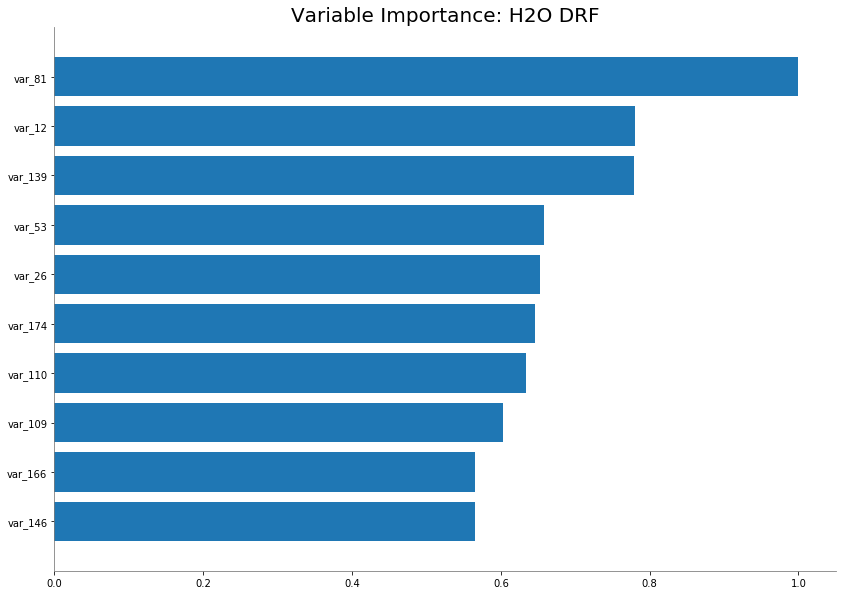

In [42]:
if mod is not None:
  print(mod_id)
  print(mod.algo)
  mod.varimp_plot()

### Create a dictionary with the pair of variable names and its importance value
More specifically, the values are the compared numbers in descending.

In [43]:
varimp={}
if mod is not None:
  l=mod.varimp()
  for v in l:
    varimp[v[0]]=v[2]

In [44]:
varimp

{'var_81': 1.0,
 'var_12': 0.7803395127565761,
 'var_139': 0.7792429416171127,
 'var_53': 0.6582857816026966,
 'var_26': 0.6522692549982978,
 'var_174': 0.6463929958771676,
 'var_110': 0.6343455221283741,
 'var_109': 0.6024374151337355,
 'var_166': 0.5650227694780176,
 'var_146': 0.5647523288894776,
 'var_99': 0.5547539029468818,
 'var_6': 0.5317554711251427,
 'var_22': 0.5246354958929748,
 'var_80': 0.5094277053404473,
 'var_76': 0.4976856697214917,
 'var_0': 0.4648578927886096,
 'var_198': 0.4536384908172775,
 'var_179': 0.4477472010563822,
 'var_148': 0.4476591525669837,
 'var_190': 0.44725984226813353,
 'var_2': 0.44321019412376306,
 'var_1': 0.4358441822938176,
 'var_165': 0.4354261252929727,
 'var_13': 0.43489264850854453,
 'var_133': 0.4327161453142286,
 'var_21': 0.4305844567211308,
 'var_78': 0.4260975611649977,
 'var_44': 0.40100812331203417,
 'var_170': 0.40098718579723236,
 'var_164': 0.40051258364051856,
 'var_94': 0.38244012508598246,
 'var_40': 0.38118060184456454,
 'var

Add penalty term inside the dictionary for the variables not shown in the keys.

In [45]:
penalty=0.9
if mod is not None:
  l=mod.varimp()
  for v in l:
    if v[0] in varimp:   
      varimp[v[0]]=((v[2]+varimp[v[0]])/2)
    else:   
      varimp[v[0]]=(v[2]*penalty)

In [46]:
varimp

{'var_81': 1.0,
 'var_12': 0.7803395127565761,
 'var_139': 0.7792429416171127,
 'var_53': 0.6582857816026966,
 'var_26': 0.6522692549982978,
 'var_174': 0.6463929958771676,
 'var_110': 0.6343455221283741,
 'var_109': 0.6024374151337355,
 'var_166': 0.5650227694780176,
 'var_146': 0.5647523288894776,
 'var_99': 0.5547539029468818,
 'var_6': 0.5317554711251427,
 'var_22': 0.5246354958929748,
 'var_80': 0.5094277053404473,
 'var_76': 0.4976856697214917,
 'var_0': 0.4648578927886096,
 'var_198': 0.4536384908172775,
 'var_179': 0.4477472010563822,
 'var_148': 0.4476591525669837,
 'var_190': 0.44725984226813353,
 'var_2': 0.44321019412376306,
 'var_1': 0.4358441822938176,
 'var_165': 0.4354261252929727,
 'var_13': 0.43489264850854453,
 'var_133': 0.4327161453142286,
 'var_21': 0.4305844567211308,
 'var_78': 0.4260975611649977,
 'var_44': 0.40100812331203417,
 'var_170': 0.40098718579723236,
 'var_164': 0.40051258364051856,
 'var_94': 0.38244012508598246,
 'var_40': 0.38118060184456454,
 'var

### Get all vatiable names

In [51]:
def get_variable_names(df):
    d={}
    n={} 
    e={}    
    for key, val in df.types.items():
      if val in ['real','int','enum']:
         d[key]=val
      if val in ['real','int']:
         n[key]=val            
      if val in ['enum']:
         e[key]=val            
    return  d,n, e

In [53]:
v,ir,e=get_variable_names(df_train)
print(v)

{'target': 'enum', 'var_0': 'real', 'var_1': 'real', 'var_2': 'real', 'var_3': 'real', 'var_4': 'real', 'var_5': 'real', 'var_6': 'real', 'var_7': 'real', 'var_8': 'real', 'var_9': 'real', 'var_10': 'real', 'var_11': 'real', 'var_12': 'real', 'var_13': 'real', 'var_14': 'real', 'var_15': 'real', 'var_16': 'real', 'var_17': 'real', 'var_18': 'real', 'var_19': 'real', 'var_20': 'real', 'var_21': 'real', 'var_22': 'real', 'var_23': 'real', 'var_24': 'real', 'var_25': 'real', 'var_26': 'real', 'var_27': 'real', 'var_28': 'real', 'var_29': 'real', 'var_30': 'real', 'var_31': 'real', 'var_32': 'real', 'var_33': 'real', 'var_34': 'real', 'var_35': 'real', 'var_36': 'real', 'var_37': 'real', 'var_38': 'real', 'var_39': 'real', 'var_40': 'real', 'var_41': 'real', 'var_42': 'real', 'var_43': 'real', 'var_44': 'real', 'var_45': 'real', 'var_46': 'real', 'var_47': 'real', 'var_48': 'real', 'var_49': 'real', 'var_50': 'real', 'var_51': 'real', 'var_52': 'real', 'var_53': 'real', 'var_54': 'real', '

In [54]:
list(v.keys())

['target',
 'var_0',
 'var_1',
 'var_2',
 'var_3',
 'var_4',
 'var_5',
 'var_6',
 'var_7',
 'var_8',
 'var_9',
 'var_10',
 'var_11',
 'var_12',
 'var_13',
 'var_14',
 'var_15',
 'var_16',
 'var_17',
 'var_18',
 'var_19',
 'var_20',
 'var_21',
 'var_22',
 'var_23',
 'var_24',
 'var_25',
 'var_26',
 'var_27',
 'var_28',
 'var_29',
 'var_30',
 'var_31',
 'var_32',
 'var_33',
 'var_34',
 'var_35',
 'var_36',
 'var_37',
 'var_38',
 'var_39',
 'var_40',
 'var_41',
 'var_42',
 'var_43',
 'var_44',
 'var_45',
 'var_46',
 'var_47',
 'var_48',
 'var_49',
 'var_50',
 'var_51',
 'var_52',
 'var_53',
 'var_54',
 'var_55',
 'var_56',
 'var_57',
 'var_58',
 'var_59',
 'var_60',
 'var_61',
 'var_62',
 'var_63',
 'var_64',
 'var_65',
 'var_66',
 'var_67',
 'var_68',
 'var_69',
 'var_70',
 'var_71',
 'var_72',
 'var_73',
 'var_74',
 'var_75',
 'var_76',
 'var_77',
 'var_78',
 'var_79',
 'var_80',
 'var_81',
 'var_82',
 'var_83',
 'var_84',
 'var_85',
 'var_86',
 'var_87',
 'var_88',
 'var_89',
 'var_90'

Filter the variables with the threshold of 0.3

In [58]:
def feature_selection(d,l, thresh=0.3):  # the threshold needed to be decide.
    iv=[]
    for key in d.keys():
      if d[key]>thresh:
        iv.append(key)
    for v in iv:
        if v not in l:
            iv.remove(v)
    return iv

In [59]:
X=feature_selection(varimp,list(v.keys()))
print(X)

['var_81', 'var_12', 'var_139', 'var_53', 'var_26', 'var_174', 'var_110', 'var_109', 'var_166', 'var_146', 'var_99', 'var_6', 'var_22', 'var_80', 'var_76', 'var_0', 'var_198', 'var_179', 'var_148', 'var_190', 'var_2', 'var_1', 'var_165', 'var_13', 'var_133', 'var_21', 'var_78', 'var_44', 'var_170', 'var_164', 'var_94', 'var_40', 'var_154', 'var_34', 'var_191', 'var_33', 'var_108', 'var_9', 'var_123', 'var_18', 'var_184', 'var_177', 'var_92', 'var_86', 'var_115', 'var_75', 'var_121', 'var_169', 'var_122', 'var_155', 'var_147', 'var_91', 'var_127']


In [60]:
len(X)

53

### Train the model after filtering the features.

In [61]:
# automl
# runs for run_time seconds then builds a stacked ensemble
aml = H2OAutoML(max_runtime_secs=run_time,project_name = project) # init automl, run for 300 seconds
aml.train(x=X,  
           y=y,
           training_frame=df_train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [62]:
aml.leaderboard

model_id,auc,logloss,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20190224_212548,0.872329,0.224509,0.256929,0.252008,0.063508
StackedEnsemble_AllModels_AutoML_20190224_212548,0.872329,0.224509,0.256929,0.252008,0.063508
GLM_grid_1_AutoML_20190224_212548_model_1,0.859378,0.232107,0.270732,0.258029,0.0665789
GLM_grid_1_AutoML_20190224_220755_model_1,0.809237,0.260007,0.308009,0.272298,0.0741462
XRT_1_AutoML_20190224_212548,0.805302,0.279015,0.31685,0.282503,0.0798079
DRF_1_AutoML_20190224_212548,0.802965,0.278544,0.314142,0.282269,0.0796759
DRF_1_AutoML_20190224_220755,0.7983,0.273252,0.319452,0.279364,0.0780443
XRT_1_AutoML_20190224_220755,0.797507,0.273879,0.308665,0.279664,0.0782118


### DRF model

In [63]:
mod,mod_id=get_model_by_algo("DRF",models_dict)

DRF_1_AutoML_20190224_212548
drf


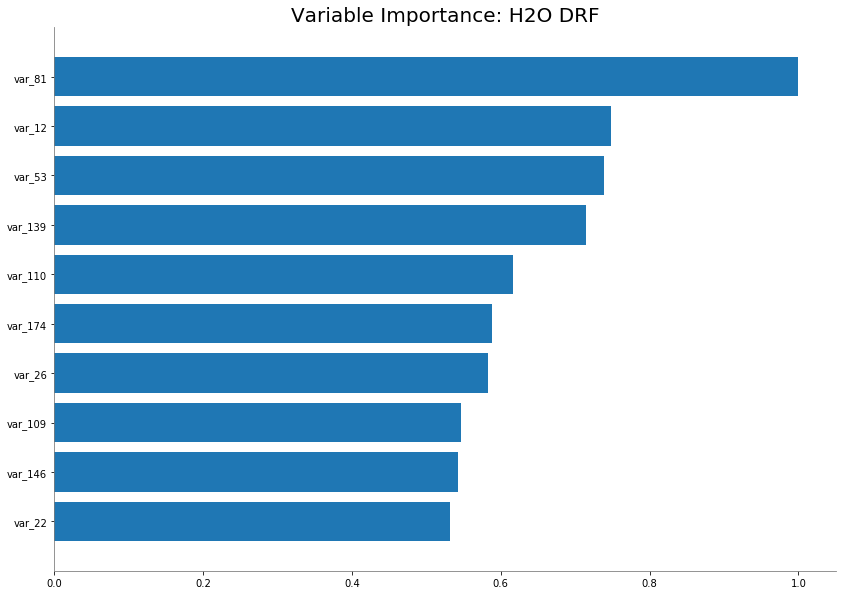

In [64]:
if mod is not None:
  print(mod_id)
  print(mod.algo)
  mod.varimp_plot()

In [67]:
varimp={}
if mod is not None:
  l=mod.varimp()
  for v in l:
    varimp[v[0]]=v[2]

In [70]:
penalty=0.9
if mod is not None:
  l=mod.varimp()
  for v in l:
    if v[0] in varimp:   
      varimp[v[0]]=((v[2]+varimp[v[0]])/2)
    else:   
      varimp[v[0]]=(v[2]*penalty)
   

In [71]:
varimp

{'var_81': 1.0,
 'var_12': 0.7477416517324695,
 'var_53': 0.738629789976947,
 'var_139': 0.714923933103008,
 'var_110': 0.6170208791366699,
 'var_174': 0.587800043930147,
 'var_26': 0.5835196772160604,
 'var_109': 0.5468575575248852,
 'var_146': 0.5419133118609344,
 'var_22': 0.5318395030556086,
 'var_166': 0.5257084249400066,
 'var_80': 0.5215857140804332,
 'var_6': 0.5191850033974016,
 'var_76': 0.47394531723108696,
 'var_99': 0.46293855732576256,
 'var_165': 0.44635656909657856,
 'var_133': 0.43796955476590776,
 'var_78': 0.42913212812822676,
 'var_2': 0.4285207754697344,
 'var_179': 0.41875822407248886,
 'var_198': 0.414943588764557,
 'var_148': 0.4086152612098855,
 'var_0': 0.3931103827054812,
 'var_13': 0.39222641679855974,
 'var_164': 0.39119975489441366,
 'var_190': 0.3889730455703426,
 'var_94': 0.3861132237953594,
 'var_44': 0.38538960805687106,
 'var_1': 0.385164850955686,
 'var_21': 0.3778898441300907,
 'var_34': 0.3720318411453041,
 'var_170': 0.3693881546669623,
 'var_177

In [72]:
v,ir,e=get_variable_names(df_train)
print(v)

{'target': 'enum', 'var_0': 'real', 'var_1': 'real', 'var_2': 'real', 'var_3': 'real', 'var_4': 'real', 'var_5': 'real', 'var_6': 'real', 'var_7': 'real', 'var_8': 'real', 'var_9': 'real', 'var_10': 'real', 'var_11': 'real', 'var_12': 'real', 'var_13': 'real', 'var_14': 'real', 'var_15': 'real', 'var_16': 'real', 'var_17': 'real', 'var_18': 'real', 'var_19': 'real', 'var_20': 'real', 'var_21': 'real', 'var_22': 'real', 'var_23': 'real', 'var_24': 'real', 'var_25': 'real', 'var_26': 'real', 'var_27': 'real', 'var_28': 'real', 'var_29': 'real', 'var_30': 'real', 'var_31': 'real', 'var_32': 'real', 'var_33': 'real', 'var_34': 'real', 'var_35': 'real', 'var_36': 'real', 'var_37': 'real', 'var_38': 'real', 'var_39': 'real', 'var_40': 'real', 'var_41': 'real', 'var_42': 'real', 'var_43': 'real', 'var_44': 'real', 'var_45': 'real', 'var_46': 'real', 'var_47': 'real', 'var_48': 'real', 'var_49': 'real', 'var_50': 'real', 'var_51': 'real', 'var_52': 'real', 'var_53': 'real', 'var_54': 'real', '

In [73]:
X=feature_selection(varimp,list(v.keys()))
print(X)

['var_81', 'var_12', 'var_53', 'var_139', 'var_110', 'var_174', 'var_26', 'var_109', 'var_146', 'var_22', 'var_166', 'var_80', 'var_6', 'var_76', 'var_99', 'var_165', 'var_133', 'var_78', 'var_2', 'var_179', 'var_198', 'var_148', 'var_0', 'var_13', 'var_164', 'var_190', 'var_94', 'var_44', 'var_1', 'var_21', 'var_34', 'var_170', 'var_177', 'var_154', 'var_191', 'var_108', 'var_40', 'var_33', 'var_9', 'var_92', 'var_115', 'var_18', 'var_123', 'var_184']


### After filtering the variables the columns reduced to 44 

In [74]:
len(X)

44

### Run the h2o AutoML model

In [75]:
# automl
# runs for run_time seconds then builds a stacked ensemble

run_time = 60 * 10
aml = H2OAutoML(max_runtime_secs=run_time,project_name = project) # init automl, run for 300 seconds
aml.train(x=X,  
           y=y,
           training_frame=df_train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [76]:
aml.leaderboard

model_id,auc,logloss,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20190224_212548,0.872329,0.224509,0.256929,0.252008,0.063508
StackedEnsemble_AllModels_AutoML_20190224_212548,0.872329,0.224509,0.256929,0.252008,0.063508
GLM_grid_1_AutoML_20190224_212548_model_1,0.859378,0.232107,0.270732,0.258029,0.0665789
GLM_grid_1_AutoML_20190224_220755_model_1,0.809237,0.260007,0.308009,0.272298,0.0741462
XRT_1_AutoML_20190224_212548,0.805302,0.279015,0.31685,0.282503,0.0798079
DRF_1_AutoML_20190224_212548,0.802965,0.278544,0.314142,0.282269,0.0796759
DRF_1_AutoML_20190224_220755,0.7983,0.273252,0.319452,0.279364,0.0780443
XRT_1_AutoML_20190224_220755,0.797507,0.273879,0.308665,0.279664,0.0782118
GLM_grid_1_AutoML_20190224_225925_model_1,0.796109,0.266007,0.31987,0.27514,0.0757019
XRT_1_AutoML_20190224_225925,0.792934,0.274522,0.321322,0.279824,0.0783012


# License
Copyright (c) 2019 Hao Zhou 

 Permission is hereby granted, free of charge, to any person obtaining a copy 
 of this software and associated documentation files (the "Software"), to deal 
 in the Software without restriction, including without limitation the rights 
 to use, copy, modify, merge, publish, distribute, sublicense, and/or sell 
 copies of the Software, and to permit persons to whom the Software is 
 furnished to do so, subject to the following conditions: 
 
 The above copyright notice and this permission notice shall be included in all 
 copies or substantial portions of the Software. 
 
   THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR 
 IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, 
 FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE 
 AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER 
 LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, 
 OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE 
 SOFTWARE.

# Citations

Exploratory Data Analysis: https://www.kaggle.com/gpreda/santander-eda-and-prediction

H2O AutoML: https://github.com/nikbearbrown/Kaggle/blob/master/NBB_Zillow_House_Price_Prediction_Feature_Selection.ipynb

LightGBM : https://www.kaggle.com/deepak525/sctp-lightgbm-lb-0-899

XGBoost Classifier : https://www.kaggle.com/stuarthallows/using-xgboost-with-scikit-learn

XGBoost Regression : https://machinelearningmastery.com/tune-number-size-decision-trees-xgboost-python/

Hyper parameter tuning: https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html

# Conclusion
We used the Santander_Transaction_Customer_Prediction dataset to predict the target by initially running the base model on H2O AutoML and got ensembled stack learning as the best model with an accuracy of 87.23%. As the first part of the assignment we got a rank of 1948 out of 3000 in the Kaggle Competition which was not a good score and then we started to train the model using LightGBM and predicted the target.We ran 3 models which were LightGBM, catboost and XGboost. Lightgbm predicted the best accuracy out of all the 3 models. The final step was tunning the hyperparameters of the model by adding more number of leaves, maxbin,reducing the learning rate,max_depth and num_leaves.We got an accuracy of 89.95% which was better than previous model accuracy.We got even better outcome of 589 out of 3000 in the Kaggle Cometition leaderboard after tunning the hyperparameters.Finally, we conclude that out of all the models, lightgbm performed well which gave the accuracy of 89.48% and after hyperparameter tuning the accuracy changed to 89.95%.
<table style="text-align:left"> 
    <thead> 
    <tr> <th>Number</th> <th>Model Name</th> <th>Accuray</th> </tr> </thead> <tbody> 
    <tr> 
         <th scope='row'>1</th> <td style="text-align:center">H2O AutoML</td> <td>0.8723</td> </tr> 
        <tr> <th scope='row'>2</th> <td style="text-align:center">XGBoosting</td>  <td>0.8921</td> </tr>
        <tr> <th scope='row'>3</th> <td style="text-align:center">CatBoosting</td>  <td>0.8910</td> </tr>
    <tr> <th scope='row'>4</th> <td style="text-align:center">LightGBM</td>  <td>0.8948</td> </tr>
            <tr> <th scope='row'>5</th> <td style="text-align:center">Hyperparameter Tuning</td>  <td>0.8995</td> </tr>

# Contributions
1)The Santander_Transaction_Customer_Prediction dataset which we used we had to predict the probability to identify which products and services might help them achieve their monetary goals.

2)The first task was performing H2O AutoML which gave the best model for our predction. We referred Professor Nik Brown's notebook for that and we reduced the features from 201 to 44. Along with that, we also ranked the importance of the variables and deleted some variables according to the threshold and then used that dataset to be trained by H2O.

3)We extended the model by hyperparameter tuning using GridSearch CV to improve the model performance.In this we tunned the hyperparameters of the model by adding more number of leaves, maxbin,reducing the learning rate,max_depth and num_leaves.

4)We made use of Boosting ensembled learning methods and we used an additional boosting which was lightGBM and Catboosting.